In [1]:
import swat
import getpass
import os

# CAS 연결

os.environ['CAS_CLIENT_SSL_CA_LIST']="/opt/trustedcerts.pem"
os.environ["TKESSL_OPENSSL_LIB"]= "/usr/lib/x86_64-linux-gnu/libssl.so.3"

conn = swat.CAS('10.0.81.23', 8777, username='viya_admin', password='Password123')
conn

CAS('10.0.81.23', 8777, 'viya_admin', protocol='https', name='py-session-1', session='84c97d9c-3cd8-ce42-9e27-00a3afe48a00')

In [2]:
# 기본 패키지
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-c777a1cj because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
print(sys.version)
print(swat.__version__)

3.10.11 | packaged by conda-forge | (main, May 10 2023, 18:58:44) [GCC 11.3.0]
1.13.0


In [4]:
type(conn)

swat.cas.connection.CAS

In [6]:
# dir(conn)

In [9]:
r = conn.serverstatus()

NOTE: Grid node action status report: 3 nodes, 56 total actions executed.


In [10]:
type(r)

swat.cas.results.CASResults

In [11]:
isinstance(r, dict)

True

In [12]:
r.keys()

odict_keys(['About', 'nodestatus', 'server'])

In [14]:
r["nodestatus"]

,name,role,uptime,running,stalled
0,worker-1.sas-cas-server-default.sasschool.svc....,worker,509.332,0,0
1,worker-0.sas-cas-server-default.sasschool.svc....,worker,509.332,0,0
2,controller.sas-cas-server-default.sasschool.sv...,controller,509.423,0,0


In [15]:
r["nodestatus"]["name"]

0    worker-1.sas-cas-server-default.sasschool.svc....
1    worker-0.sas-cas-server-default.sasschool.svc....
2    controller.sas-cas-server-default.sasschool.sv...
Name: nodes, dtype: object

In [17]:
r["About"]["Version"]

'4.00'

In [18]:
for key, value in r.items():
    print(key)
    print(value)

About
{'CAS': 'Cloud Analytic Services', 'CASCacheLocation': 'CAS Disk Cache', 'CASHostAccountRequired': 'OPTIONAL', 'Copyright': 'Copyright © 2014-2023 SAS Institute Inc. All Rights Reserved.', 'ServerTime': '2023-06-07T05:17:02Z', 'System': {'Hostname': 'controller.sas-cas-server-default.sasschool.svc.cluster.local', 'Linux Distribution': 'Red Hat Enterprise Linux release 8.7 (Ootpa)', 'Model Number': 'x86_64', 'OS Family': 'LIN X64', 'OS Name': 'Linux', 'OS Release': '5.15.0-1034-azure', 'OS Version': '#41-Ubuntu SMP Fri Feb 10 19:59:45 UTC 2023'}, 'Transferred': 'NO', 'Version': '4.00', 'VersionLong': 'V.04.00M0P03132023', 'Viya Release': '20230410.1681164470247', 'Viya Version': 'Stable 2023.03', 'license': {'expires': '17Jun2023:00:00:00', 'gracePeriod': 0, 'site': 'SAS SCHOOL - VIYA4 0518', 'siteNum': 70306281, 'warningPeriod': 31}}
nodestatus
Node Status

                                                name        role   uptime  \
0  worker-1.sas-cas-server-default.sasschool.sv

In [19]:
isinstance(r['nodestatus'], pd.DataFrame)

True

In [20]:
type(r['nodestatus'])

swat.dataframe.SASDataFrame

In [21]:
conn.caslibinfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(viya_admin),PATH,Personal File System Caslib,/cas/data/caslibs/casuserlibraries/viya_admin/,,1.0,0.0,1.0,1.0,0.0,1.0
1,Formats,PATH,Stores user defined formats.,/cas/data/caslibs/formats/,,0.0,0.0,0.0,0.0,0.0,0.0
2,ModelPerformanceData,PATH,Stores performance data output for the Model M...,/cas/data/caslibs/modelMonitorLibrary/,,0.0,0.0,0.0,0.0,0.0,0.0
3,Models,PATH,Stores models created by Visual Analytics for ...,/cas/data/caslibs/models/,,0.0,0.0,0.0,0.0,0.0,0.0
4,Public,PATH,"Shared and writeable caslib, accessible to all...",/cas/data/caslibs/public/,,0.0,0.0,0.0,0.0,0.0,0.0
5,Samples,PATH,"Stores sample data, supplied by SAS.",/cas/data/caslibs/samples/,,0.0,0.0,0.0,0.0,0.0,0.0
6,SystemData,PATH,"Stores application generated data, used for ge...",/cas/data/caslibs/sysData/,,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
url ="https://github.com/bong-ju-kang/data/blob/master/claim.csv?raw=true"

In [24]:
pdf = pd.read_csv(url)
pdf.shape

(10300, 23)

In [25]:
# 카스서버에 올리기
conn.read_csv(url)

NOTE: Cloud Analytic Services made the uploaded file available as table TMPC3ERXND9 in caslib CASUSER(viya_admin).
NOTE: The table TMPC3ERXND9 has been created in caslib CASUSER(viya_admin) from binary data uploaded to Cloud Analytic Services.


CASTable('TMPC3ERXND9', caslib='CASUSER(viya_admin)')

In [26]:
conn.read_csv(url, casout={'name':'claim', 'replace':True })

NOTE: Cloud Analytic Services made the uploaded file available as table CLAIM in caslib CASUSER(viya_admin).
NOTE: The table CLAIM has been created in caslib CASUSER(viya_admin) from binary data uploaded to Cloud Analytic Services.


CASTable('CLAIM', caslib='CASUSER(viya_admin)')

In [28]:
conn.upload_file(url, casout={'replace':True})

NOTE: Cloud Analytic Services made the uploaded file available as table CLAIM in caslib CASUSER(viya_admin).
NOTE: The table CLAIM has been created in caslib CASUSER(viya_admin) from binary data uploaded to Cloud Analytic Services.


CASTable('CLAIM', caslib='CASUSER(viya_admin)')

In [29]:
conn.table.tableinfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TMPC3ERXND9,10300,23,0,utf-8,2023-06-07T05:33:03+00:00,2023-06-07T05:33:03+00:00,2023-06-07T05:33:03+00:00,UTF8,2.001735e+09,0,0,0,,,0,viya_admin,,2023-06-07T05:33:03+00:00,2.001735e+09
1,CLAIM,10300,23,0,utf-8,2023-06-07T05:36:35+00:00,2023-06-07T05:36:35+00:00,2023-06-07T05:36:35+00:00,UTF8,2.001735e+09,0,0,0,,,0,viya_admin,,2023-06-07T05:36:35+00:00,2.001735e+09


In [30]:
conn.tableinfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TMPC3ERXND9,10300,23,0,utf-8,2023-06-07T05:33:03+00:00,2023-06-07T05:33:03+00:00,2023-06-07T05:33:03+00:00,UTF8,2.001735e+09,0,0,0,,,0,viya_admin,,2023-06-07T05:33:03+00:00,2.001735e+09
1,CLAIM,10300,23,0,utf-8,2023-06-07T05:36:35+00:00,2023-06-07T05:36:35+00:00,2023-06-07T05:36:35+00:00,UTF8,2.001735e+09,0,0,0,,,0,viya_admin,,2023-06-07T05:36:35+00:00,2.001735e+09


In [31]:
conn.fileinfo()

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,clamim.sashdat,3356288,NONE,2023-06-07T01:35:43+00:00,2.001721e+09
1,-rwxr-xr-x,sas,sas,_MM_SYS_KPI_.sashdat,11008,NONE,2023-04-18T07:42:49+00:00,1.997423e+09
2,-rwxr-xr-x,sas,sas,lgbm_model.sashdat,766128,NONE,2023-06-07T01:38:03+00:00,2.001721e+09
3,-rwxr-xr-x,sas,sas,lgbm_model_score.sashdat,1252072,NONE,2023-06-06T14:41:01+00:00,2.001682e+09
4,-rwxr-xr-x,sas,sas,impute_code.sashdat,13352,NONE,2023-06-07T01:37:59+00:00,2.001721e+09


In [33]:
df = conn.CASTable('claim')

In [34]:
type(df)

swat.cas.table.CASTable

In [35]:
isinstance(df, pd.DataFrame)

False

In [36]:
df.dtypes

id               double
child_driv       double
age              double
children         double
yoj              double
income           double
house_val        double
status          varchar
gender          varchar
edu_level       varchar
job             varchar
distance         double
car_use         varchar
vehicle_val      double
vehicle_type    varchar
clm_freq         double
revoked         varchar
mvr_pts          double
claim_amount     double
vehicle_age      double
claim_ind        double
area            varchar
state_code      varchar
dtype: object

In [37]:
pdf.dtypes

id              float64
child_driv        int64
age             float64
children          int64
yoj             float64
income          float64
house_val       float64
status           object
gender           object
edu_level        object
job              object
distance          int64
car_use          object
vehicle_val       int64
vehicle_type     object
clm_freq          int64
revoked          object
mvr_pts           int64
claim_amount      int64
vehicle_age     float64
claim_ind         int64
area             object
state_code       object
dtype: object

In [38]:
df.info()

CASTable('claim')
Data columns (total 23 columns):
                  N   Miss     Type
id            10300  False   double
child_driv    10300  False   double
age           10293   True   double
children      10300  False   double
yoj            9752   True   double
income         9730   True   double
house_val      9725   True   double
status        10298   True  varchar
gender        10300  False  varchar
edu_level     10300  False  varchar
job            9635   True  varchar
distance      10300  False   double
car_use       10300  False  varchar
vehicle_val   10300  False   double
vehicle_type  10300  False  varchar
clm_freq      10300  False   double
revoked       10300  False  varchar
mvr_pts       10300  False   double
claim_amount  10300  False   double
vehicle_age    9661   True   double
claim_ind     10300  False   double
area          10300  False  varchar
state_code    10300  False  varchar
dtypes: double(14), varchar(9)
data size: 3347058
vardata size: 710258
memory usage: 

In [40]:
df.describe(include='all')

,id,child_driv,age,children,yoj,income,house_val,status,gender,edu_level,vehicle_val,vehicle_type,clm_freq,revoked,mvr_pts,claim_amount,vehicle_age,claim_ind,area,state_code
count,1.030000e+04,10300.000000,10293.000000,10300.000000,9752.000000,9730.000000,9.725000e+03,10298.0,10300.0,10300.0,10300.000000,10300.0,10300.000000,10300.0,10300.000000,10300.000000,9661.000000,10300.000000,10300.0,10300.0
unique,9.649000e+03,5.000000,95.000000,6.000000,21.000000,8451.000000,6.948000e+03,2.0,2.0,5.0,2985.000000,8.0,8.000000,2.0,17.000000,2663.000000,30.000000,2.000000,2.0,10.0
top,1.020000e+10,0.000000,54.000000,0.000000,15.000000,960.000000,1.413360e+05,NaN,NaN,NaN,1500.000000,NaN,2.000000,NaN,2.000000,285.000000,3.000000,0.000000,NaN,NaN
freq,2.900000e+01,9062.000000,347.000000,6689.000000,1500.000000,392.000000,5.600000e+01,6187.0,5545.0,2950.0,207.000000,2883.0,3887.000000,9039.0,2729.000000,76.000000,2488.000000,7554.000000,8228.0,5122.0
mean,4.537007e+09,0.170000,53.797921,0.720971,13.473954,62436.569270,4.168986e+05,NaN,NaN,NaN,15660.132039,NaN,1.808641,NaN,3.202621,1810.642718,10.297899,0.266602,NaN,NaN
std,3.054959e+09,0.507381,13.172204,1.116310,4.109358,47461.614467,2.356174e+05,NaN,NaN,NaN,8429.568867,NaN,1.528187,NaN,2.585899,4725.594945,5.713707,0.442204,NaN,NaN
min,1.130032e+07,0.000000,5.000000,0.000000,3.000000,560.000000,0.000000e+00,NaN,NaN,NaN,1500.000000,NaN,0.000000,NaN,0.000000,115.000000,-1.000000,0.000000,NaN,NaN
25%,2.135167e+09,0.000000,45.000000,0.000000,12.000000,28468.000000,2.473380e+05,NaN,NaN,NaN,9200.000000,NaN,0.000000,NaN,2.000000,278.000000,3.000000,0.000000,NaN,NaN
50%,3.964367e+09,0.000000,54.000000,0.000000,14.000000,54308.000000,3.886740e+05,NaN,NaN,NaN,14400.000000,NaN,2.000000,NaN,3.000000,323.000000,10.000000,0.000000,NaN,NaN
75%,6.280766e+09,0.000000,63.000000,1.000000,16.000000,86978.000000,5.581550e+05,NaN,NaN,NaN,20895.000000,NaN,3.000000,NaN,5.000000,1447.500000,14.000000,1.000000,NaN,NaN


In [41]:
df.groupby('status').mean()

,id,child_driv,age,children,yoj,income,house_val,distance,vehicle_val,clm_freq,mvr_pts,claim_amount,vehicle_age,claim_ind
status,,,,,,,,,,,,,,
,4.118077e+09,0.500000,37.500000,1.000000,13.500000,34187.000000,397768.500000,58.000000,11470.000000,3.500000,4.500000,3475.000000,7.500000,0.500000
Yes,4.560444e+09,0.187167,54.444301,0.762728,13.947711,61060.980773,461861.736725,78.498788,15611.908841,1.727816,3.132859,1487.946986,10.133907,0.219816
z_No,4.501938e+09,0.144004,52.832197,0.657991,12.768445,64504.030746,349342.182754,78.309900,15734.745804,1.929458,3.306981,2295.485770,10.546895,0.336901


In [46]:
pdf.groupby('status')['age'].agg(['mean','max','min'])

,mean,max,min
status,,,
Yes,54.444301,103.0,7.0
z_No,52.832197,98.0,5.0


In [48]:
df.columninfo()['ColumnInfo']['Column']

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,id,,1,double,8,12,,0,0
1,child_driv,,2,double,8,12,,0,0
2,age,,3,double,8,12,,0,0
3,children,,4,double,8,12,,0,0
4,yoj,,5,double,8,12,,0,0
5,income,,6,double,8,12,,0,0
6,house_val,,7,double,8,12,,0,0
7,status,,8,varchar,4,4,,0,0
8,gender,,9,varchar,3,3,,0,0
9,edu_level,,10,varchar,13,13,,0,0


In [49]:
df.fetch(to=10)

,id,child_driv,age,children,yoj,income,house_val,status,gender,edu_level,vehicle_val,vehicle_type,clm_freq,revoked,mvr_pts,claim_amount,vehicle_age,claim_ind,area,state_code
0,6.921625e+09,0.0,67.0,0.0,14.0,53841.0,359229.0,z_No,Mal,Bachelors,21970.0,Family,0.0,No,2.0,294.0,12.0,0.0,Highly Urban/ Urban,Berlin
1,1.227899e+09,0.0,26.0,1.0,13.0,16999.0,265527.0,,Fem,z_High School,4010.0,unknown,4.0,No,7.0,292.0,12.0,0.0,Highly Urban/ Urban,Thueringen
2,1.950524e+09,0.0,71.0,0.0,17.0,NaN,323918.0,Yes,Mal,<High School,15440.0,Minivan,0.0,No,0.0,387.0,8.0,0.0,Highly Urban/ Urban,Bayern
3,1.743448e+09,0.0,68.0,0.0,NaN,115546.0,361705.0,Yes,Fem,PhD,18000.0,unknown,4.0,Yes,3.0,308.0,19.0,0.0,Highly Urban/ Urban,Bayern
4,7.371333e+09,0.0,32.0,1.0,15.0,125861.0,70668.0,z_No,Fem,Bachelors,17430.0,Sports Car,0.0,No,0.0,3221.0,9.0,1.0,Highly Urban/ Urban,Bayern
5,4.792606e+09,0.0,60.0,0.0,NaN,19715.0,NaN,Yes,Fem,<High School,8780.0,unknown,0.0,No,0.0,308.0,3.0,0.0,Highly Urban/ Urban,Bayern
6,7.008255e+09,1.0,49.0,1.0,14.0,51375.0,530010.0,,Mal,z_High School,18930.0,Minivan,3.0,No,2.0,6658.0,3.0,1.0,Highly Urban/ Urban,Bayern
7,6.003886e+09,0.0,68.0,2.0,15.0,44446.0,111891.0,z_No,Fem,<High School,5900.0,unknown,0.0,No,2.0,203.0,12.0,0.0,z_Highly Rural/ Rural,Bayern
8,4.892513e+09,1.0,58.0,2.0,NaN,108921.0,480905.0,Yes,Mal,Bachelors,16970.0,Van,1.0,Yes,10.0,4312.0,9.0,1.0,Highly Urban/ Urban,Bayern
9,3.577688e+09,0.0,23.0,0.0,13.0,64338.0,300339.0,z_No,Fem,Bachelors,11200.0,unknown,0.0,No,4.0,2734.0,3.0,1.0,Highly Urban/ Urban,Berlin


In [50]:
df.pop('id')

CASColumn('claim')['id']

In [51]:
df.columns

Index(['child_driv', 'age', 'children', 'yoj', 'income', 'house_val', 'status',
       'gender', 'edu_level', 'job', 'distance', 'car_use', 'vehicle_val',
       'vehicle_type', 'clm_freq', 'revoked', 'mvr_pts', 'claim_amount',
       'vehicle_age', 'claim_ind', 'area', 'state_code'],
      dtype='object')

In [52]:
conn.CASTable('claim').columns

Index(['id', 'child_driv', 'age', 'children', 'yoj', 'income', 'house_val',
       'status', 'gender', 'edu_level', 'job', 'distance', 'car_use',
       'vehicle_val', 'vehicle_type', 'clm_freq', 'revoked', 'mvr_pts',
       'claim_amount', 'vehicle_age', 'claim_ind', 'area', 'state_code'],
      dtype='object')

In [59]:
df.select_dtypes('double').summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,child_driv,0.0,4.0,10300.0,0.0,0.170000,1.751000e+03,0.507381,0.004999,2.574357e-01,2.949000e+03,2.651330e+03,298.459524,34.004248,2.689376e-240,3.332569,11.595267
1,age,5.0,103.0,10293.0,7.0,53.797921,5.537420e+05,13.172204,0.129834,1.735070e+02,3.157590e+07,1.785734e+06,24.484597,414.360189,0.000000e+00,-0.005356,0.032104
2,children,0.0,5.0,10300.0,0.0,0.720971,7.426000e+03,1.116310,0.010999,1.246147e+00,1.818800e+04,1.283407e+04,154.834222,65.546824,0.000000e+00,1.334891,0.623757
3,yoj,3.0,26.0,9752.0,548.0,13.473954,1.313980e+05,4.109358,0.041613,1.688682e+01,1.935114e+06,1.646634e+05,30.498528,323.793382,0.000000e+00,-1.200628,1.143854
4,income,560.0,367590.0,9730.0,570.0,62436.569270,6.075078e+08,47461.614467,481.156201,2.252605e+09,5.984630e+13,2.191559e+13,76.015731,129.763618,0.000000e+00,1.161994,1.988531
5,house_val,0.0,1586073.0,9725.0,575.0,416898.584679,4.054339e+09,235617.387059,2389.255148,5.551555e+10,2.230081e+15,5.398332e+14,56.516716,174.488934,0.000000e+00,0.674600,0.469599
6,distance,50.0,187.0,10300.0,0.0,78.419417,8.077200e+05,15.869675,0.156369,2.518466e+02,6.593470e+07,2.593768e+06,20.236921,501.503744,0.000000e+00,0.435261,0.594793
7,vehicle_val,1500.0,69740.0,10300.0,0.0,15660.132039,1.612994e+08,8429.568867,83.059010,7.105763e+07,3.257792e+12,7.318225e+11,53.828211,188.542243,0.000000e+00,0.769236,0.651432
8,clm_freq,0.0,7.0,10300.0,0.0,1.808641,1.862900e+04,1.528187,0.015058,2.335356e+00,5.774500e+04,2.405183e+04,84.493680,120.114210,0.000000e+00,0.502681,-0.305203
9,mvr_pts,0.0,17.0,10300.0,0.0,3.202621,3.298700e+04,2.585899,0.025480,6.686875e+00,1.745130e+05,6.886813e+04,80.743211,125.693435,0.000000e+00,0.918088,0.756690


/opt/conda/lib/python3.10/site-packages/swat/cas/table.py:6651: RuntimeWarning: Data downloads are limited to 10000 rows.  To change this limit, set swat.options.cas.dataset.max_rows_fetched to the desired limit.
  warnings.warn(('Data downloads are limited to %d rows.  '


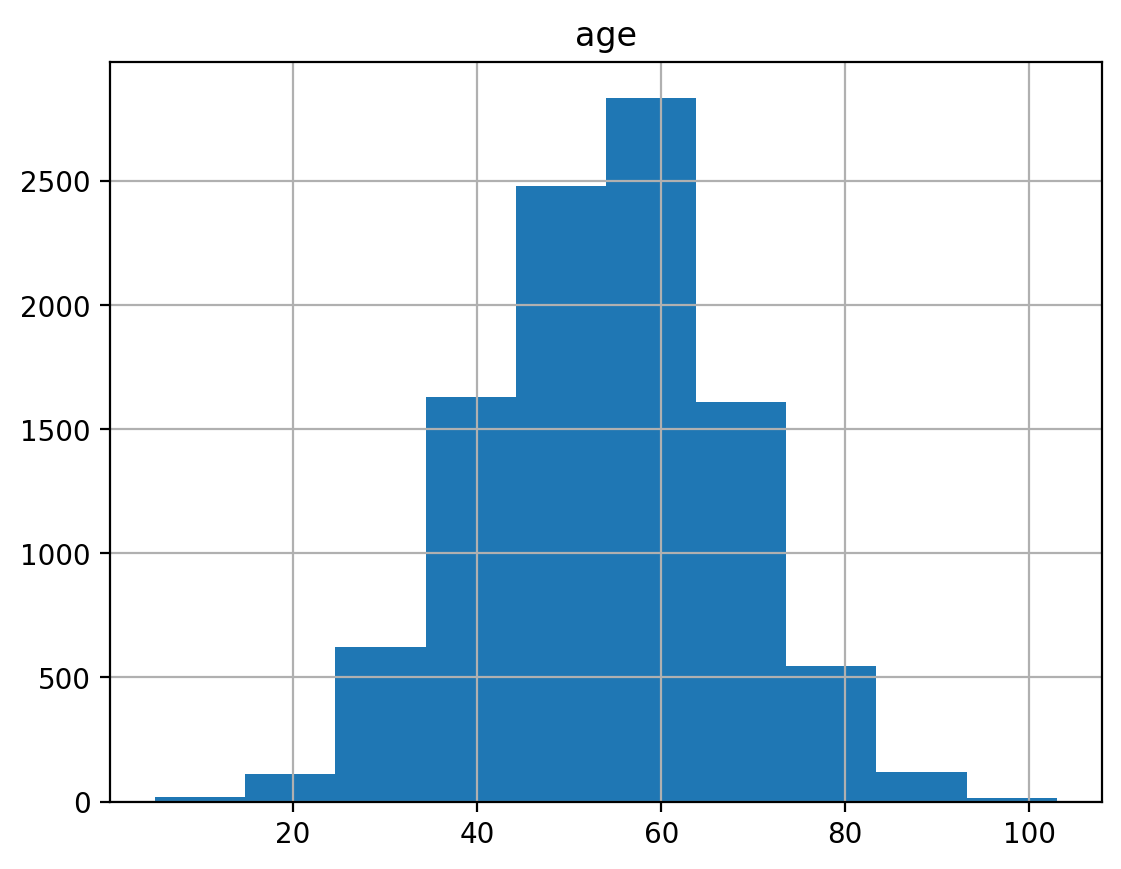

In [62]:
fig, ax = plt.subplots(dpi=200)
df['age'].hist(ax=ax)
plt.show()


In [65]:
r = conn.actionsetinfo()
r['setinfo']['actionset'].unique()

array(['accessControl', 'aggregation', 'builtins', 'configuration',
       'dataPreprocess', 'dataStep', 'percentile', 'sampling', 'sccasl',
       'search', 'session', 'sessionProp', 'simple', 'table'],
      dtype=object)

In [66]:
conn.help(actionset='table')

NOTE: Information for action set 'table':
NOTE:    table
NOTE:       view - Creates a view from files or tables
NOTE:       attribute - Manages extended table attributes
NOTE:       upload - Transfers binary data to the server to create objects like tables
NOTE:       loadTable - Loads a table from a caslib's data source
NOTE:       tableExists - Checks whether a table has been loaded
NOTE:       index - Create indexes on one or more table variables
NOTE:       columnInfo - Shows column information
NOTE:       fetch - Fetches rows from a table or view
NOTE:       save - Saves a table to a caslib's data source
NOTE:       addTable - Add a table by sending it from the client to the server
NOTE:       tableInfo - Shows information about a table
NOTE:       tableDetails - Get detailed information about a table
NOTE:       dropTable - Drops a table
NOTE:       deleteSource - Delete a table or file from a caslib's data source
NOTE:       fileInfo - Lists the files in a caslib's data source
N

,name,description
0,view,Creates a view from files or tables
1,attribute,Manages extended table attributes
2,upload,Transfers binary data to the server to create ...
3,loadTable,Loads a table from a caslib's data source
4,tableExists,Checks whether a table has been loaded
5,index,Create indexes on one or more table variables
6,columnInfo,Shows column information
7,fetch,Fetches rows from a table or view
8,save,Saves a table to a caslib's data source
9,addTable,Add a table by sending it from the client to t...


In [ ]:
conn.table.caslibinfo()
conn.caslibinfo()

In [67]:
# datasciencepilot, dataSciencePilot
# loadactionset
conn.loadactionset('dataSciencePilot')

NOTE: Added action set 'dataSciencePilot'.


[actionset]

 'dataSciencePilot'

+ Elapsed: 0.0102s, user: 0.00406s, sys: 0.012s, mem: 0.742mb

In [68]:
conn.help(actionset='dataSciencePilot')

NOTE: Information for action set 'dataSciencePilot':
NOTE:    dataSciencePilot
NOTE:       exploreData - Exploration, automatic variable analysis and grouping using comprehensive statistical profiling of the variables.
NOTE:       screenVariables - Screens noise variables and variables that need special transformations to be useful in the downstream analytics.
NOTE:       analyzeMissingPatterns - Missing pattern analysis
NOTE:       exploreCorrelation - Explore linear and nonlinear correlation among the variables.
NOTE:       detectInteractions - Variable interaction detection and ranking
NOTE:       generateShadowFeatures - Generate shadow features.
NOTE:       featureMachine - Automated feature transformation and generation engine
NOTE:       selectFeatures - Feature selection
NOTE:       dsAutoMl - Automated machine learning pipeline exploration, execution and ranking.


,name,description
0,exploreData,"Exploration, automatic variable analysis and g..."
1,screenVariables,Screens noise variables and variables that nee...
2,analyzeMissingPatterns,Missing pattern analysis
3,exploreCorrelation,Explore linear and nonlinear correlation among...
4,detectInteractions,Variable interaction detection and ranking
5,generateShadowFeatures,Generate shadow features.
6,featureMachine,Automated feature transformation and generatio...
7,selectFeatures,Feature selection
8,dsAutoMl,Automated machine learning pipeline exploratio...


In [70]:
df.exploredata(
    casout={'name':'explore_out', 'replace':True}
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(viya_admin),explore_out,22,42,"CASTable('explore_out', caslib='CASUSER(viya_a..."


In [72]:
conn.CASTable('explore_out').head(999)

,Variable,VarType,MissingRated,CardinalityRated,EntropyRated,IQVRated,CVRated,SkewnessRated,KurtosisRated,OutlierRated,MomentCVPer,RobustCVPer,MomentSkewness,RobustSkewness,MomentKurtosis,RobustKurtosis,LowerOutlierMomentPer,UpperOutlierMomentPer,LowerOutlierRobustPer,UpperOutlierRobustPer
0,status,character-nominal,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gender,character-nominal,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,edu_level,character-nominal,1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,job,character-nominal,2.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,car_use,character-nominal,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,vehicle_type,character-nominal,1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,revoked,character-nominal,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,area,character-nominal,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,state_code,character-nominal,1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,child_driv,numeric-nominal,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# 엔트로리: sum(p*(-log2(p)))
v = df['edu_level'].value_counts(normalize=True).to_numpy()
v.dot(-np.log2(v))

2.21504380450781

In [78]:
url ="https://github.com/bong-ju-kang/data/raw/master/gcr.csv"

In [79]:
conn.upload_file(url, casout={'replace':True})

NOTE: Cloud Analytic Services made the uploaded file available as table GCR in caslib CASUSER(viya_admin).
NOTE: The table GCR has been created in caslib CASUSER(viya_admin) from binary data uploaded to Cloud Analytic Services.


CASTable('GCR', caslib='CASUSER(viya_admin)')

In [80]:
conn.tableinfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TMPC3ERXND9,10300,23,0,utf-8,2023-06-07T05:33:03+00:00,2023-06-07T05:33:03+00:00,2023-06-07T05:33:03+00:00,UTF8,2.001735e+09,0,0,0,,,0,viya_admin,,2023-06-07T05:33:03+00:00,2.001735e+09
1,CLAIM,10300,23,0,utf-8,2023-06-07T05:36:35+00:00,2023-06-07T05:36:35+00:00,2023-06-07T06:28:49+00:00,UTF8,2.001735e+09,0,0,0,,,0,viya_admin,,2023-06-07T05:36:35+00:00,2.001735e+09
2,EXPLORE_OUT,22,42,0,utf-8,2023-06-07T06:18:33+00:00,2023-06-07T06:18:33+00:00,2023-06-07T06:19:53+00:00,UTF8,2.001738e+09,0,0,0,,,0,viya_admin,,,NaN
3,GCR,1000,21,0,utf-8,2023-06-07T06:36:27+00:00,2023-06-07T06:36:27+00:00,2023-06-07T06:36:27+00:00,UTF8,2.001739e+09,0,0,0,,,0,viya_admin,,2023-06-07T06:36:27+00:00,2.001739e+09


In [81]:
gcr = conn.CASTable('gcr')
gcr.fetch(to=5)

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,property,age,other,housing,existcr,job,depends,telephon,foreign,good_bad
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1.0
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,0.0
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1.0
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1.0
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,0.0


In [82]:
gcr.info()

CASTable('gcr')
Data columns (total 21 columns):
             N   Miss     Type
checking  1000  False  varchar
duration  1000  False   double
history   1000  False  varchar
purpose   1000  False  varchar
amount    1000  False   double
savings   1000  False  varchar
employed  1000  False  varchar
installp  1000  False   double
marital   1000  False  varchar
coapp     1000  False  varchar
resident  1000  False   double
property  1000  False  varchar
age       1000  False   double
other     1000  False  varchar
housing   1000  False  varchar
existcr   1000  False   double
job       1000  False  varchar
depends   1000  False   double
telephon  1000  False  varchar
foreign   1000  False  varchar
good_bad  1000  False   double
dtypes: double(8), varchar(13)
data size: 318012
vardata size: 46012
memory usage: 0


In [85]:
gcr.select_dtypes('double').columns.tolist()

['duration',
 'amount',
 'installp',
 'resident',
 'age',
 'existcr',
 'depends',
 'good_bad']

In [86]:
gcr.exploredata(
    casout={'name':'gcr_explore_out', 'replace':True}
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(viya_admin),gcr_explore_out,21,42,"CASTable('gcr_explore_out', caslib='CASUSER(vi..."


In [92]:
conn.CASTable('gcr_explore_out')['MissingRated'].head(999).to_numpy()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

<Axes: >

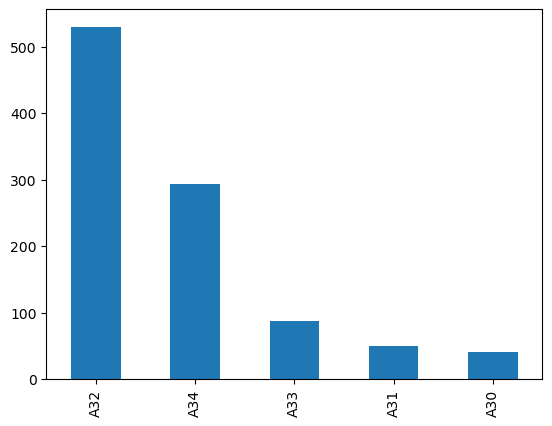

In [93]:
fig, ax = plt.subplots(dpi=200)
gcr['history'].value_counts().plot.bar()
plt.show()

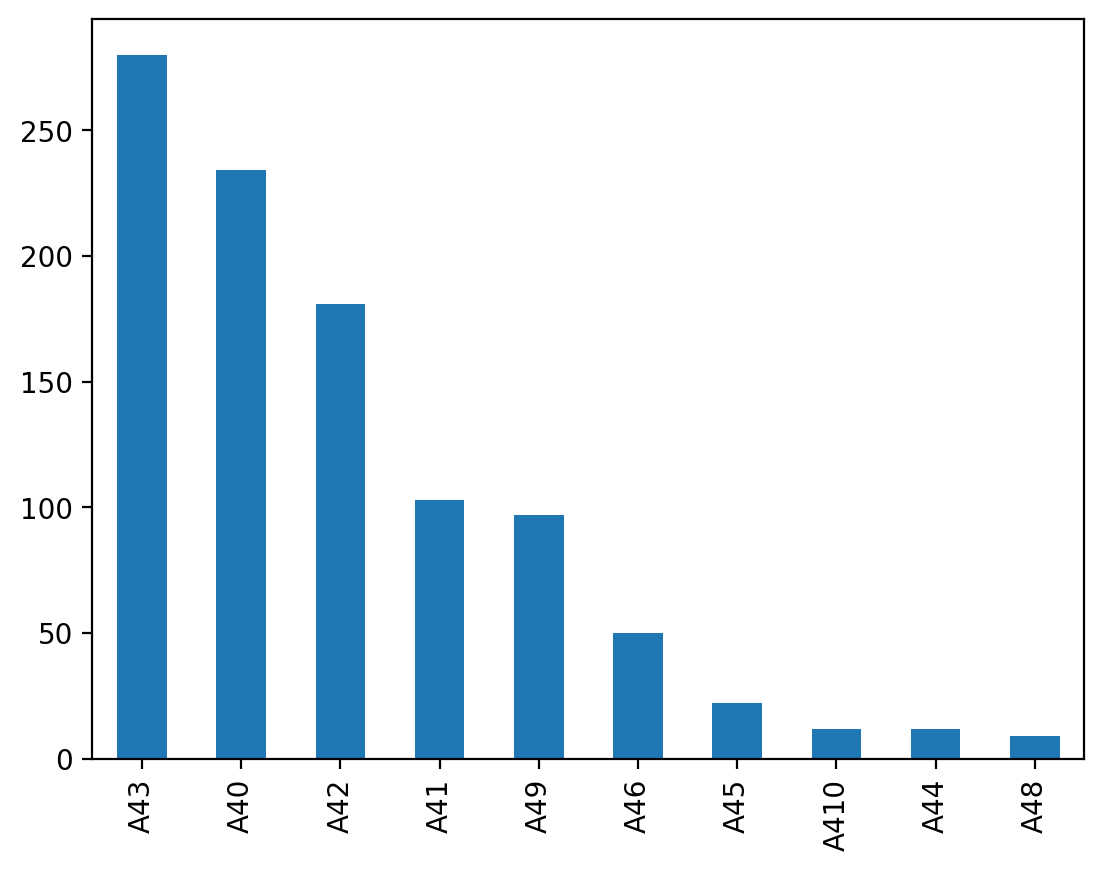

In [94]:
fig, ax = plt.subplots(dpi=200)
gcr['purpose'].value_counts().plot.bar()
plt.show()

In [97]:
# y ~ x 
df.screenVariables(
    target = 'claim_ind',
    casout = {'name':'scr_out', 'replace':True}
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(viya_admin),scr_out,21,3,"CASTable('scr_out', caslib='CASUSER(viya_admin)')"


In [104]:
r = conn.CASTable('scr_out').head(999)
r

,Variable,Recommendation,Reason
0,status,keep,passed all screening tests
1,gender,remove,low target mutual information
2,edu_level,keep,passed all screening tests
3,job,keep,passed all screening tests
4,car_use,keep,passed all screening tests
5,vehicle_type,keep,passed all screening tests
6,revoked,keep,passed all screening tests
7,area,keep,passed all screening tests
8,state_code,keep,passed all screening tests
9,child_driv,keep,passed all screening tests


In [105]:
xvars = r[r['Recommendation']=='keep']['Variable'].tolist()
xvars, len(xvars)

(['status',
  'edu_level',
  'job',
  'car_use',
  'vehicle_type',
  'revoked',
  'area',
  'state_code',
  'child_driv',
  'age',
  'children',
  'yoj',
  'income',
  'house_val',
  'distance',
  'vehicle_val',
  'clm_freq',
  'mvr_pts',
  'vehicle_age'],
 19)

In [106]:
target = 'claim_ind'
event = '1'

# xvars 중에서 범주형 변수만 골라서 cats 리스트를 만들고 싶음
cats = [x for x in df.select_dtypes('varchar').columns.tolist() if x in xvars]
cats

['status',
 'edu_level',
 'job',
 'car_use',
 'vehicle_type',
 'revoked',
 'area',
 'state_code']

In [107]:
xvars

['status',
 'edu_level',
 'job',
 'car_use',
 'vehicle_type',
 'revoked',
 'area',
 'state_code',
 'child_driv',
 'age',
 'children',
 'yoj',
 'income',
 'house_val',
 'distance',
 'vehicle_val',
 'clm_freq',
 'mvr_pts',
 'vehicle_age']

In [109]:
# 숫자형 변수만 고르고 싶다. xvars, cats
nums = list(set(xvars)-set(cats))
nums

['children',
 'house_val',
 'vehicle_age',
 'yoj',
 'age',
 'vehicle_val',
 'mvr_pts',
 'income',
 'clm_freq',
 'distance',
 'child_driv']

In [110]:
conn.actionsetinfo()

,actionset,label,loaded,extension,version,product_name,user_defined
0,accessControl,Access Controls,1,tkacon,V.04.00M0P03132023,tkcas,false
1,accessControl,Access Controls,1,casmeta,V.04.00M0P03132023,tkcas,false
2,aggregation,Aggregation,1,tkcasagg,V.04.00M0P03132023,crsaggregate,false
3,builtins,Builtins,1,tkcasablt,V.04.00M0P03132023,tkcas,false
4,configuration,Server Properties,1,tkcascfg,V.04.00M0P03132023,tkcas,false
5,dataPreprocess,Data Preprocess,1,tktrans,V.04.00M0P03132023,crsstat,false
6,dataSciencePilot,Data Science Pilot,1,tkdspilot,V.04.00M0P03132023,crsdspilot,false
7,dataStep,DATA Step,1,datastep,V.04.00M0P03132023,tkcas,false
8,percentile,Percentile,1,tkcasptl,V.04.00M0P03132023,crsstat,false
9,sampling,Sampling and Partitioning,1,tkcassamp,V.04.00M0P03132023,crssampling,false


In [112]:
conn.stratified(
    table = {'name':df, 'groupby':target},
    samppct = 70,
    partind = True,
    output = {'casout':{'name':'claim_part', 'replace':True}, 'copyvars':'all'}
)

NOTE: Stratified sampling is in effect.
NOTE: Using SEED=1305431951 for sampling.


[OutputCasTables]

                 casLib        Name Label   Rows  Columns                                           casTable
 0  CASUSER(viya_admin)  claim_part        10300       24  CASTable('claim_part', caslib='CASUSER(viya_ad...

[STRAFreq]

 Frequencies
 
    ByGrpID     claim_ind  NObs  NSamp
 0        0             0  7554   5288
 1        1             1  2746   1922

+ Elapsed: 0.184s, user: 0.206s, sys: 0.109s, mem: 112mb

In [114]:
5288/7554, 1922/2746

(0.7000264760391846, 0.6999271667880553)

In [117]:
conn.CASTable('claim_part').columns
conn.CASTable('claim_part')["_PartInd_"].value_counts(normalize=True)

1.0    0.7
0.0    0.3
dtype: float64

In [118]:
train = conn.CASTable('claim_part', where='_PartInd_=1')

In [120]:
train.explorecorrelation(
    casout={'name':'corr_out', 'replace':True},
    target=target,
    inputs=xvars,
    nominals=cats + [target]
)

# mi = E(log(p(x,y)/(px * py))

,casLib,Name,Rows,Columns,casTable
0,CASUSER(viya_admin),corr_out,19,4,"CASTable('corr_out', caslib='CASUSER(viya_admi..."


In [123]:
conn.CASTable('corr_out').sort_values('MI', ascending=False).head(999)

,FirstVariable,SecondVariable,Type,MI
0,area,claim_ind,_nt_,0.044307
1,clm_freq,claim_ind,_it_,0.033325
2,job,claim_ind,_nt_,0.029752
3,income,claim_ind,_it_,0.023781
4,mvr_pts,claim_ind,_it_,0.023510
5,vehicle_val,claim_ind,_it_,0.020306
6,edu_level,claim_ind,_nt_,0.017239
7,revoked,claim_ind,_nt_,0.016744
8,house_val,claim_ind,_it_,0.015422
9,vehicle_type,claim_ind,_nt_,0.013118


In [124]:
conn.help(actionset='datasciencepilot')

NOTE: Information for action set 'datasciencepilot':
NOTE:    dataSciencePilot
NOTE:       exploreData - Exploration, automatic variable analysis and grouping using comprehensive statistical profiling of the variables.
NOTE:       screenVariables - Screens noise variables and variables that need special transformations to be useful in the downstream analytics.
NOTE:       analyzeMissingPatterns - Missing pattern analysis
NOTE:       exploreCorrelation - Explore linear and nonlinear correlation among the variables.
NOTE:       detectInteractions - Variable interaction detection and ranking
NOTE:       generateShadowFeatures - Generate shadow features.
NOTE:       featureMachine - Automated feature transformation and generation engine
NOTE:       selectFeatures - Feature selection
NOTE:       dsAutoMl - Automated machine learning pipeline exploration, execution and ranking.


,name,description
0,exploreData,"Exploration, automatic variable analysis and g..."
1,screenVariables,Screens noise variables and variables that nee...
2,analyzeMissingPatterns,Missing pattern analysis
3,exploreCorrelation,Explore linear and nonlinear correlation among...
4,detectInteractions,Variable interaction detection and ranking
5,generateShadowFeatures,Generate shadow features.
6,featureMachine,Automated feature transformation and generatio...
7,selectFeatures,Feature selection
8,dsAutoMl,Automated machine learning pipeline exploratio...


In [128]:
# 결측값 진단
train.nmiss()/len(train)

id              0.000000
child_driv      0.000000
age             0.000555
children        0.000000
yoj             0.050624
income          0.057420
house_val       0.055062
status          0.000139
gender          0.000000
edu_level       0.000000
job             0.063384
distance        0.000000
car_use         0.000000
vehicle_val     0.000000
vehicle_type    0.000000
clm_freq        0.000000
revoked         0.000000
mvr_pts         0.000000
claim_amount    0.000000
vehicle_age     0.062413
claim_ind       0.000000
area            0.000000
state_code      0.000000
_PartInd_       0.000000
dtype: float64

In [127]:
pdf.isnull().sum()

id                0
child_driv        0
age               7
children          0
yoj             548
income          570
house_val       575
status            2
gender            0
edu_level         0
job             669
distance          0
car_use           0
vehicle_val       0
vehicle_type      0
clm_freq          0
revoked           0
mvr_pts           0
claim_amount      0
vehicle_age     639
claim_ind         0
area              0
state_code        0
dtype: int64

In [129]:
train.impute(
    # 결측값 처리 방식
    methodInterval='mean',
    methodNominal='mode',

    # 처리변수
    inputs=xvars,

    # 결과 테이블
    casout={'name':'train_impute_out', 'replace':True},

    # 모델 저장
    code ={'casout':{'name':'impute_code','replace':True}},

    # 추가 복사할 변수
    copyvars = target
)

,Variable,ImputeTech,ResultVar,N,NMiss,ImputedValueContinuous,ImputedValueNominal
0,status,Mode,IMP_status,7209.0,1.0,NaN,Yes
1,edu_level,Mode,IMP_edu_level,7210.0,0.0,NaN,z_High School
2,job,Mode,IMP_job,6753.0,457.0,NaN,Teacher
3,car_use,Mode,IMP_car_use,7210.0,0.0,NaN,Private
4,vehicle_type,Mode,IMP_vehicle_type,7210.0,0.0,NaN,unknown
5,revoked,Mode,IMP_revoked,7210.0,0.0,NaN,No
6,area,Mode,IMP_area,7210.0,0.0,NaN,Highly Urban/ Urban
7,state_code,Mode,IMP_state_code,7210.0,0.0,NaN,Bayern
8,child_driv,Mean,IMP_child_driv,7210.0,0.0,0.165881,
9,age,Mean,IMP_age,7206.0,4.0,53.897169,


In [131]:
conn.CASTable('train_impute_out').nmiss()

claim_ind           0
IMP_age             0
IMP_child_driv      0
IMP_children        0
IMP_clm_freq        0
IMP_distance        0
IMP_house_val       0
IMP_income          0
IMP_mvr_pts         0
IMP_vehicle_age     0
IMP_vehicle_val     0
IMP_yoj             0
IMP_area            0
IMP_car_use         0
IMP_edu_level       0
IMP_job             0
IMP_revoked         0
IMP_state_code      0
IMP_status          0
IMP_vehicle_type    0
dtype: int64